In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

4.5.4


In [2]:
import cufflinks as cf
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()
from pandas_datareader import data, wb

import datetime

In [3]:
# show all columns 

pd.set_option('display.max_columns', None)

In [4]:
df_caries=pd.read_csv('//home/jorgemsr123/Desktop/Pavita/CSV_tables/tabla_caries_informacion_importante',header=[0])

In [5]:
df_caries.drop([0,1,2], inplace=True)

df_caries.drop('Unnamed: 0', axis=1, inplace=True)


In [6]:
df_caries['Rango Edad']= df_caries['Edad'].apply(lambda x: '16-20' if x=='16-20' else ('20-35' if (x=='20-24' or x =='24-30' or x =='30-35') else ('35-50' if (x=='35-40' or x =='40-50') else '>50')))

In [8]:
df_caries

,Sitio,Rasgo,Periodo,Sexo,Edad,N° dientes,N° dientes.1,suma_dientes,numero_de_caries,numero_de_dientes_caries_no_obs,porcentaje_dientes_con_caries,car_P_1,car_P_2,car_P_3,car_P_4,numero_de_caries_localizadas,numero_de_dientes_caries_no_loc,porcentaje_dientes_con_caries_localizadas,car_L_1,car_L_2,car_L_3,car_L_4,car_L_5,car_L_6,car_L_7,car_L_8,Rango Edad
3,01 Palma Plana,Rasgo L-20 (II),4.1,M,24-30,9,1,10.0,3.0,0.0,0.300000,1.0,2.0,0.0,0.0,3.0,0.0,0.300000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,20-35
4,02 Palma Torre,B-5 Tumba 2,4.2,F,20-24,11,4,15.0,4.0,0.0,0.266667,4.0,0.0,0.0,0.0,4.0,0.0,0.266667,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20-35
5,02 Palma Torre,Rasgo 05 cuadro 29,4.2,F,16-20,6,2,8.0,3.0,0.0,0.375000,3.0,0.0,0.0,0.0,3.0,0.0,0.375000,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16-20
6,09 El Refugio,Salv. 1 Tumba 2 Ind 1,4.2,F,24-30,13,16,29.0,10.0,0.0,0.344828,7.0,1.0,2.0,0.0,10.0,0.0,0.344828,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,20-35
7,09 El Refugio,Salv. 44 Tumba 2 Ind 1,4.1,F,35-40,1,2,3.0,1.0,0.0,0.333333,0.0,0.0,1.0,0.0,1.0,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,El Edén,"Rasgo 28, Ind 1",4.0,F,35-40,2,5,7.0,4.0,0.0,0.571429,3.0,1.0,0.0,0.0,4.0,0.0,0.571429,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,35-50
62,El Edén,"Rasgo 28, Ind 2",4.0,F,24-30,12,15,27.0,16.0,0.0,0.592593,10.0,4.0,2.0,0.0,16.0,0.0,0.592593,8.0,1.0,0.0,4.0,0.0,3.0,0.0,0.0,20-35
63,El Edén,"Rasgo 28, Ind 3",4.0,M,>50,0,1,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,>50
64,El Edén,"Rasgo 29, Ind 1",4.0,M,40-50,10,14,24.0,7.0,0.0,0.291667,2.0,2.0,0.0,3.0,16.0,0.0,0.666667,2.0,0.0,0.0,0.0,0.0,2.0,9.0,3.0,35-50


In [11]:
trial_2=df_caries[['numero_de_caries_localizadas','numero_de_dientes_caries_no_loc','porcentaje_dientes_con_caries_localizadas','car_L_1','car_L_2','car_L_3','car_L_4','car_L_5','car_L_6','car_L_7','car_L_8']]

In [12]:
trial_1= df_caries [['suma_dientes','numero_de_caries','porcentaje_dientes_con_caries','car_P_1','car_P_2','car_P_3','car_P_4']]

In [13]:
trial_1

,suma_dientes,numero_de_caries,porcentaje_dientes_con_caries,car_P_1,car_P_2,car_P_3,car_P_4
3,10.0,3.0,0.300000,1.0,2.0,0.0,0.0
4,15.0,4.0,0.266667,4.0,0.0,0.0,0.0
5,8.0,3.0,0.375000,3.0,0.0,0.0,0.0
6,29.0,10.0,0.344828,7.0,1.0,2.0,0.0
7,3.0,1.0,0.333333,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
61,7.0,4.0,0.571429,3.0,1.0,0.0,0.0
62,27.0,16.0,0.592593,10.0,4.0,2.0,0.0
63,1.0,0.0,0.000000,0.0,0.0,0.0,0.0
64,24.0,7.0,0.291667,2.0,2.0,0.0,3.0


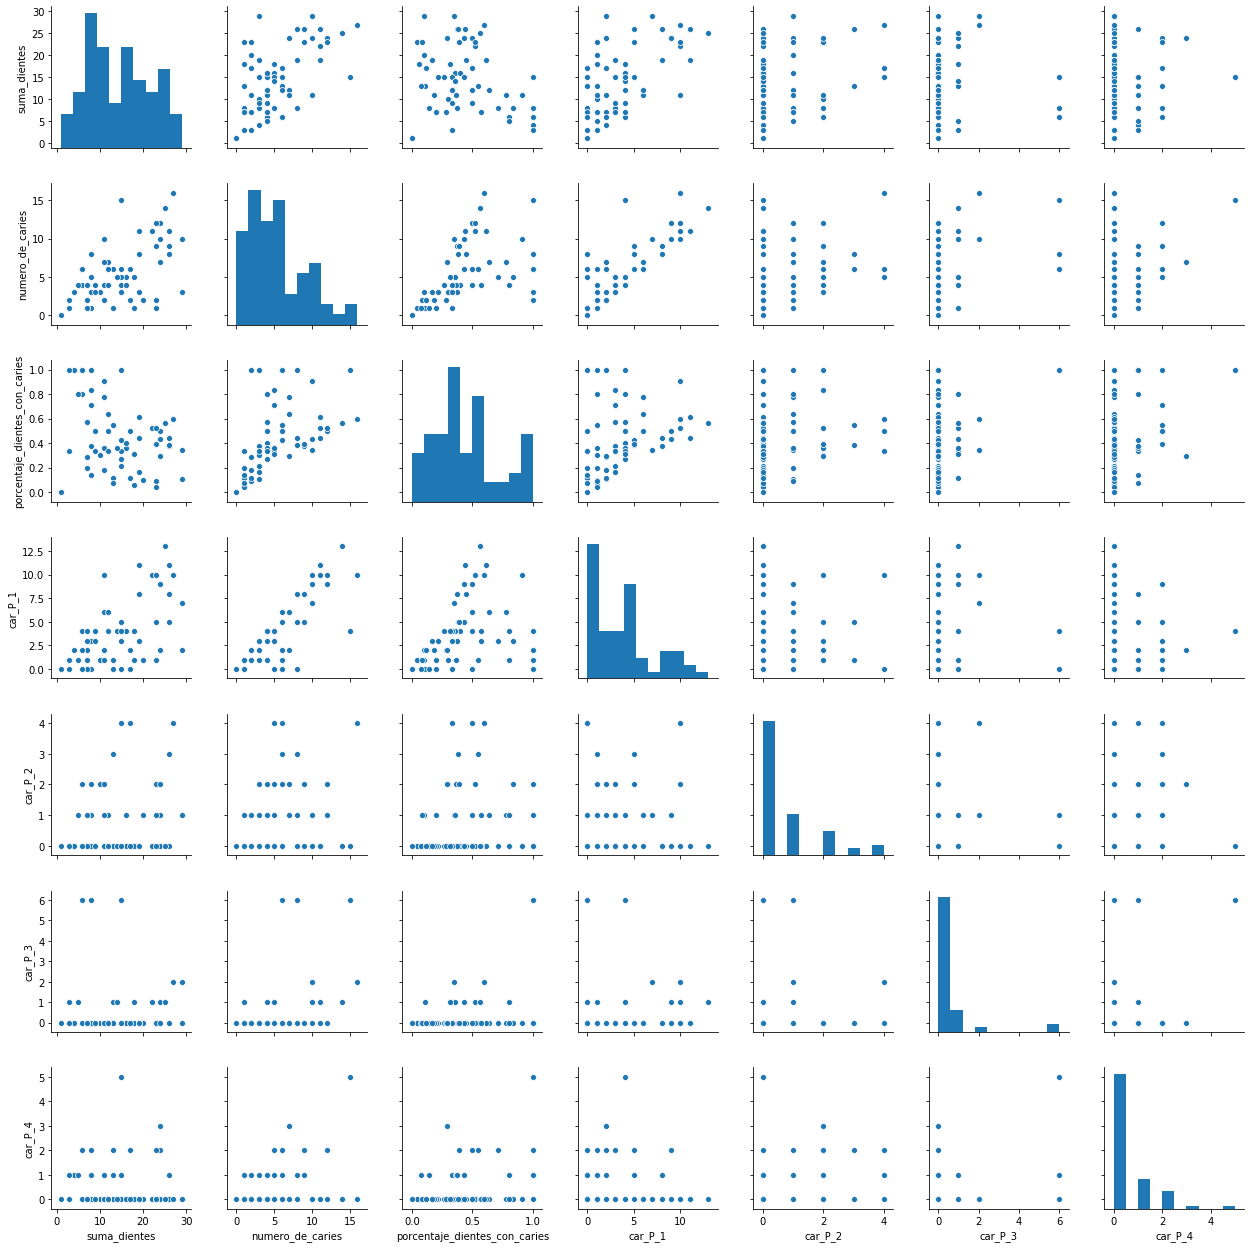

In [14]:
sns.pairplot(trial_1)

In [15]:
trial_1.corr()

,suma_dientes,numero_de_caries,porcentaje_dientes_con_caries,car_P_1,car_P_2,car_P_3,car_P_4
suma_dientes,1.000000,0.547264,-0.316884,0.549523,0.235820,-0.038479,0.008642
numero_de_caries,0.547264,1.000000,0.473466,0.811846,0.262773,0.364575,0.292802
porcentaje_dientes_con_caries,-0.316884,0.473466,1.000000,0.233343,0.096833,0.440098,0.338468
car_P_1,0.549523,0.811846,0.233343,1.000000,-0.087421,-0.051323,-0.150112
car_P_2,0.235820,0.262773,0.096833,-0.087421,1.000000,-0.043493,0.268107
car_P_3,-0.038479,0.364575,0.440098,-0.051323,-0.043493,1.000000,0.295885
car_P_4,0.008642,0.292802,0.338468,-0.150112,0.268107,0.295885,1.000000


In [17]:
trial_corr=df_caries.corr()

In [18]:
a=trial_corr>=0.5

In [19]:
trial_corr[a]

,suma_dientes,numero_de_caries,numero_de_dientes_caries_no_obs,porcentaje_dientes_con_caries,car_P_1,car_P_2,car_P_3,car_P_4,numero_de_caries_localizadas,numero_de_dientes_caries_no_loc,porcentaje_dientes_con_caries_localizadas,car_L_1,car_L_2,car_L_3,car_L_4,car_L_5,car_L_6,car_L_7,car_L_8
suma_dientes,1.000000,0.547264,NaN,NaN,0.549523,NaN,NaN,NaN,0.563855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numero_de_caries,0.547264,1.000000,NaN,NaN,0.811846,NaN,NaN,NaN,0.959491,NaN,NaN,0.699410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numero_de_dientes_caries_no_obs,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
porcentaje_dientes_con_caries,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.985281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_P_1,0.549523,0.811846,NaN,NaN,1.000000,NaN,NaN,NaN,0.747857,NaN,NaN,0.885340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_P_2,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_P_3,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.852463
car_P_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.741281,NaN,0.552786
numero_de_caries_localizadas,0.563855,0.959491,NaN,NaN,0.747857,NaN,NaN,NaN,1.000000,NaN,NaN,0.646417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numero_de_dientes_caries_no_loc,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_calculos=pd.read_csv('//home/jorgemsr123/Desktop/Pavita/CSV_tables/tabla_calculos_informacion_importante',header=[0])

In [8]:
df_calculos

,Unnamed: 0,Sitio,Rasgo,Periodo,Sexo,Edad,N° dientes,N° dientes.1,suma_dientes,numero_de_calculos,numero_de_dientes_no_obs,porcentaje_dientes_con_calculo,cal_G_1,cal_G_2,cal_G_3,cal_V,cal_L
0,NaN,Unnamed: 0_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,Unnamed: 4_level_1,Unnamed: 5_level_1,Unnamed: 6_level_1,Unnamed: 7_level_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Unnamed: 0_level_2,Unnamed: 2_level_2,Unnamed: 3_level_2,Unnamed: 4_level_2,Unnamed: 5_level_2,Unnamed: 6_level_2,Unnamed: 7_level_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Unnamed: 0_level_3,Unnamed: 2_level_3,Unnamed: 3_level_3,Unnamed: 4_level_3,Unnamed: 5_level_3,Maxilar,Mandíbula,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,01 Palma Plana,Rasgo L-20 (II),4.1,M,24-30,9,1,10.0,1.0,0.0,0.100000,0.0,1.0,0.0,1.0,0.0
4,1.0,02 Palma Torre,B-5 Tumba 2,4.2,F,20-24,11,4,15.0,5.0,0.0,0.333333,5.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,58.0,El Edén,"Rasgo 28, Ind 1",4.0,F,35-40,2,5,7.0,3.0,0.0,0.428571,1.0,2.0,0.0,1.0,2.0
62,59.0,El Edén,"Rasgo 28, Ind 2",4.0,F,24-30,12,15,27.0,27.0,0.0,1.000000,24.0,3.0,0.0,26.0,1.0
63,60.0,El Edén,"Rasgo 28, Ind 3",4.0,M,>50,0,1,1.0,1.0,0.0,1.000000,1.0,0.0,0.0,0.0,1.0
64,61.0,El Edén,"Rasgo 29, Ind 1",4.0,M,40-50,10,14,24.0,20.0,4.0,1.000000,9.0,9.0,2.0,17.0,3.0


In [9]:
df_calculos.drop([0,1,2], inplace=True)

df_calculos.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
df_calculos['Rango Edad']= df_caries['Edad'].apply(lambda x: '16-20' if x=='16-20' else ('20-35' if (x=='20-24' or x =='24-30' or x =='30-35') else ('35-50' if (x=='35-40' or x =='40-50') else '>50')))

In [11]:
trial_ab=pd.merge(df_caries,df_calculos, how='inner',on=['Sitio','Rasgo','Periodo','Sexo','Edad','N° dientes','N° dientes.1','suma_dientes','Rango Edad'])

In [14]:
trial_ab

,Sitio,Rasgo,Periodo,Sexo,Edad,N° dientes,N° dientes.1,suma_dientes,numero_de_caries,numero_de_dientes_caries_no_obs,porcentaje_dientes_con_caries,car_P_1,car_P_2,car_P_3,car_P_4,numero_de_caries_localizadas,numero_de_dientes_caries_no_loc,porcentaje_dientes_con_caries_localizadas,car_L_1,car_L_2,car_L_3,car_L_4,car_L_5,car_L_6,car_L_7,car_L_8,Rango Edad,numero_de_calculos,numero_de_dientes_no_obs,porcentaje_dientes_con_calculo,cal_G_1,cal_G_2,cal_G_3,cal_V,cal_L
0,01 Palma Plana,Rasgo L-20 (II),4.1,M,24-30,9,1,10.0,3.0,0.0,0.300000,1.0,2.0,0.0,0.0,3.0,0.0,0.300000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,20-35,1.0,0.0,0.100000,0.0,1.0,0.0,1.0,0.0
1,02 Palma Torre,B-5 Tumba 2,4.2,F,20-24,11,4,15.0,4.0,0.0,0.266667,4.0,0.0,0.0,0.0,4.0,0.0,0.266667,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20-35,5.0,0.0,0.333333,5.0,0.0,0.0,0.0,5.0
2,02 Palma Torre,Rasgo 05 cuadro 29,4.2,F,16-20,6,2,8.0,3.0,0.0,0.375000,3.0,0.0,0.0,0.0,3.0,0.0,0.375000,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16-20,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,09 El Refugio,Salv. 1 Tumba 2 Ind 1,4.2,F,24-30,13,16,29.0,10.0,0.0,0.344828,7.0,1.0,2.0,0.0,10.0,0.0,0.344828,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,20-35,1.0,0.0,0.034483,1.0,0.0,0.0,1.0,0.0
4,09 El Refugio,Salv. 44 Tumba 2 Ind 1,4.1,F,35-40,1,2,3.0,1.0,0.0,0.333333,0.0,0.0,1.0,0.0,1.0,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35-50,2.0,1.0,1.000000,1.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,El Edén,"Rasgo 28, Ind 1",4.0,F,35-40,2,5,7.0,4.0,0.0,0.571429,3.0,1.0,0.0,0.0,4.0,0.0,0.571429,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,35-50,3.0,0.0,0.428571,1.0,2.0,0.0,1.0,2.0
59,El Edén,"Rasgo 28, Ind 2",4.0,F,24-30,12,15,27.0,16.0,0.0,0.592593,10.0,4.0,2.0,0.0,16.0,0.0,0.592593,8.0,1.0,0.0,4.0,0.0,3.0,0.0,0.0,20-35,27.0,0.0,1.000000,24.0,3.0,0.0,26.0,1.0
60,El Edén,"Rasgo 28, Ind 3",4.0,M,>50,0,1,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,>50,1.0,0.0,1.000000,1.0,0.0,0.0,0.0,1.0
61,El Edén,"Rasgo 29, Ind 1",4.0,M,40-50,10,14,24.0,7.0,0.0,0.291667,2.0,2.0,0.0,3.0,16.0,0.0,0.666667,2.0,0.0,0.0,0.0,0.0,2.0,9.0,3.0,35-50,20.0,4.0,1.000000,9.0,9.0,2.0,17.0,3.0


In [12]:
df_abscesos=pd.read_csv('//home/jorgemsr123/Desktop/Pavita/CSV_tables/tabla_abscesos_informacion_importante')

In [13]:
df_abscesos

,Unnamed: 0,Sitio,Rasgo,Periodo,Sexo,Edad,N° dientes,N° dientes.1,suma_dientes,numero_de_abscesos,numero_de_dientes_abs_no_obs,porcentaje_dientes_con_abscesos,abs_G_1,abs_G_2,abs_G_3,abs_V,abs_L
0,NaN,Unnamed: 0_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,Unnamed: 4_level_1,Unnamed: 5_level_1,Unnamed: 6_level_1,Unnamed: 7_level_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Unnamed: 0_level_2,Unnamed: 2_level_2,Unnamed: 3_level_2,Unnamed: 4_level_2,Unnamed: 5_level_2,Unnamed: 6_level_2,Unnamed: 7_level_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Unnamed: 0_level_3,Unnamed: 2_level_3,Unnamed: 3_level_3,Unnamed: 4_level_3,Unnamed: 5_level_3,Maxilar,Mandíbula,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,01 Palma Plana,Rasgo L-20 (II),4.1,M,24-30,9,1,10.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,1.0,02 Palma Torre,B-5 Tumba 2,4.2,F,20-24,11,4,15.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,58.0,El Edén,"Rasgo 28, Ind 1",4.0,F,35-40,2,5,7.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
62,59.0,El Edén,"Rasgo 28, Ind 2",4.0,F,24-30,12,15,27.0,1.0,0.0,0.037037,0.0,1.0,0.0,1.0,0.0
63,60.0,El Edén,"Rasgo 28, Ind 3",4.0,M,>50,0,1,1.0,1.0,0.0,1.000000,0.0,0.0,1.0,1.0,0.0
64,61.0,El Edén,"Rasgo 29, Ind 1",4.0,M,40-50,10,14,24.0,2.0,0.0,0.083333,0.0,1.0,1.0,2.0,0.0


In [14]:
df_abscesos.drop([0,1,2], inplace=True)

df_abscesos.drop('Unnamed: 0', axis=1, inplace=True)

In [15]:
df_abscesos['Rango Edad']= df_caries['Edad'].apply(lambda x: '16-20' if x=='16-20' else ('20-35' if (x=='20-24' or x =='24-30' or x =='30-35') else ('35-50' if (x=='35-40' or x =='40-50') else '>50')))

In [16]:
trial_abc=pd.merge(trial_ab,df_abscesos, how='inner',on=['Sitio','Rasgo','Periodo','Sexo','Edad','N° dientes','N° dientes.1','suma_dientes','Rango Edad'])

In [17]:
trial_abc

,Sitio,Rasgo,Periodo,Sexo,Edad,N° dientes,N° dientes.1,suma_dientes,numero_de_caries,numero_de_dientes_caries_no_obs,porcentaje_dientes_con_caries,car_P_1,car_P_2,car_P_3,car_P_4,numero_de_caries_localizadas,numero_de_dientes_caries_no_loc,porcentaje_dientes_con_caries_localizadas,car_L_1,car_L_2,car_L_3,car_L_4,car_L_5,car_L_6,car_L_7,car_L_8,Rango Edad,numero_de_calculos,numero_de_dientes_no_obs,porcentaje_dientes_con_calculo,cal_G_1,cal_G_2,cal_G_3,cal_V,cal_L,numero_de_abscesos,numero_de_dientes_abs_no_obs,porcentaje_dientes_con_abscesos,abs_G_1,abs_G_2,abs_G_3,abs_V,abs_L
0,01 Palma Plana,Rasgo L-20 (II),4.1,M,24-30,9,1,10.0,3.0,0.0,0.300000,1.0,2.0,0.0,0.0,3.0,0.0,0.300000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,20-35,1.0,0.0,0.100000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,02 Palma Torre,B-5 Tumba 2,4.2,F,20-24,11,4,15.0,4.0,0.0,0.266667,4.0,0.0,0.0,0.0,4.0,0.0,0.266667,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20-35,5.0,0.0,0.333333,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,02 Palma Torre,Rasgo 05 cuadro 29,4.2,F,16-20,6,2,8.0,3.0,0.0,0.375000,3.0,0.0,0.0,0.0,3.0,0.0,0.375000,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16-20,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,09 El Refugio,Salv. 1 Tumba 2 Ind 1,4.2,F,24-30,13,16,29.0,10.0,0.0,0.344828,7.0,1.0,2.0,0.0,10.0,0.0,0.344828,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,20-35,1.0,0.0,0.034483,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,09 El Refugio,Salv. 44 Tumba 2 Ind 1,4.1,F,35-40,1,2,3.0,1.0,0.0,0.333333,0.0,0.0,1.0,0.0,1.0,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35-50,2.0,1.0,1.000000,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,El Edén,"Rasgo 28, Ind 1",4.0,F,35-40,2,5,7.0,4.0,0.0,0.571429,3.0,1.0,0.0,0.0,4.0,0.0,0.571429,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,35-50,3.0,0.0,0.428571,1.0,2.0,0.0,1.0,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
59,El Edén,"Rasgo 28, Ind 2",4.0,F,24-30,12,15,27.0,16.0,0.0,0.592593,10.0,4.0,2.0,0.0,16.0,0.0,0.592593,8.0,1.0,0.0,4.0,0.0,3.0,0.0,0.0,20-35,27.0,0.0,1.000000,24.0,3.0,0.0,26.0,1.0,1.0,0.0,0.037037,0.0,1.0,0.0,1.0,0.0
60,El Edén,"Rasgo 28, Ind 3",4.0,M,>50,0,1,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,>50,1.0,0.0,1.000000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.0,0.0,1.0,1.0,0.0
61,El Edén,"Rasgo 29, Ind 1",4.0,M,40-50,10,14,24.0,7.0,0.0,0.291667,2.0,2.0,0.0,3.0,16.0,0.0,0.666667,2.0,0.0,0.0,0.0,0.0,2.0,9.0,3.0,35-50,20.0,4.0,1.000000,9.0,9.0,2.0,17.0,3.0,2.0,0.0,0.083333,0.0,1.0,1.0,2.0,0.0


In [22]:
trial_abc.to_csv('//home/jorgemsr123/Desktop/Pavita/tabla_todas_patologias')

In [20]:
trial_abc.to_csv('//home/jorgemsr123/Desktop/Pavita/tabla_mix_caries_calculos_abscesos_sin_dummy_variables')

In [22]:
ac=trial_abc.corr()

In [30]:
acx=ac>=0.5

In [31]:
ac[acx]

,suma_dientes,numero_de_caries,numero_de_dientes_caries_no_obs,porcentaje_dientes_con_caries,car_P_1,car_P_2,car_P_3,car_P_4,numero_de_caries_localizadas,numero_de_dientes_caries_no_loc,porcentaje_dientes_con_caries_localizadas,car_L_1,car_L_2,car_L_3,car_L_4,car_L_5,car_L_6,car_L_7,car_L_8,numero_de_calculos,numero_de_dientes_no_obs,porcentaje_dientes_con_calculo,cal_G_1,cal_G_2,cal_G_3,cal_V,cal_L,numero_de_abscesos,numero_de_dientes_abs_no_obs,porcentaje_dientes_con_abscesos,abs_G_1,abs_G_2,abs_G_3,abs_V,abs_L
suma_dientes,1.000000,0.547264,NaN,NaN,0.549523,NaN,NaN,NaN,0.563855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.557872,NaN,NaN,NaN,NaN,NaN,0.504617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numero_de_caries,0.547264,1.000000,NaN,NaN,0.811846,NaN,NaN,NaN,0.959491,NaN,NaN,0.699410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numero_de_dientes_caries_no_obs,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
porcentaje_dientes_con_caries,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.985281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_P_1,0.549523,0.811846,NaN,NaN,1.000000,NaN,NaN,NaN,0.747857,NaN,NaN,0.885340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_P_2,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_P_3,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.852463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_P_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.741281,NaN,0.552786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.703219,NaN,NaN,NaN,0.657949,NaN,0.695562,NaN
numero_de_caries_localizadas,0.563855,0.959491,NaN,NaN,0.747857,NaN,NaN,NaN,1.000000,NaN,NaN,0.646417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numero_de_dientes_caries_no_loc,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
trial_dummies=pd.get_dummies(trial_abc,columns=['Sitio','Periodo','Sexo','Rango Edad'],drop_first=False)
    

In [33]:
trial_dummies

,Sitio,Rasgo,Edad,N° dientes,N° dientes.1,suma_dientes,numero_de_caries,numero_de_dientes_caries_no_obs,porcentaje_dientes_con_caries,car_P_1,car_P_2,car_P_3,car_P_4,numero_de_caries_localizadas,numero_de_dientes_caries_no_loc,porcentaje_dientes_con_caries_localizadas,car_L_1,car_L_2,car_L_3,car_L_4,car_L_5,car_L_6,car_L_7,car_L_8,numero_de_calculos,numero_de_dientes_no_obs,porcentaje_dientes_con_calculo,cal_G_1,cal_G_2,cal_G_3,cal_V,cal_L,numero_de_abscesos,numero_de_dientes_abs_no_obs,porcentaje_dientes_con_abscesos,abs_G_1,abs_G_2,abs_G_3,abs_V,abs_L,Periodo_2.0,Periodo_3.0,Periodo_4.0,Periodo_4.1,Periodo_4.2,Sexo_F,Sexo_I,Sexo_M,Rango Edad_16-20,Rango Edad_20-35,Rango Edad_35-50,Rango Edad_>50
0,01 Palma Plana,Rasgo L-20 (II),24-30,9,1,10.0,3.0,0.0,0.300000,1.0,2.0,0.0,0.0,3.0,0.0,0.300000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.100000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,0,1,0,0
1,02 Palma Torre,B-5 Tumba 2,20-24,11,4,15.0,4.0,0.0,0.266667,4.0,0.0,0.0,0.0,4.0,0.0,0.266667,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.333333,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,1,0,0
2,02 Palma Torre,Rasgo 05 cuadro 29,16-20,6,2,8.0,3.0,0.0,0.375000,3.0,0.0,0.0,0.0,3.0,0.0,0.375000,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,1,0,0,0
3,09 El Refugio,Salv. 1 Tumba 2 Ind 1,24-30,13,16,29.0,10.0,0.0,0.344828,7.0,1.0,2.0,0.0,10.0,0.0,0.344828,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.034483,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,1,0,0
4,09 El Refugio,Salv. 44 Tumba 2 Ind 1,35-40,1,2,3.0,1.0,0.0,0.333333,0.0,0.0,1.0,0.0,1.0,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.000000,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,El Edén,"Rasgo 28, Ind 1",35-40,2,5,7.0,4.0,0.0,0.571429,3.0,1.0,0.0,0.0,4.0,0.0,0.571429,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.428571,1.0,2.0,0.0,1.0,2.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0,0,0,0,1,0
59,El Edén,"Rasgo 28, Ind 2",24-30,12,15,27.0,16.0,0.0,0.592593,10.0,4.0,2.0,0.0,16.0,0.0,0.592593,8.0,1.0,0.0,4.0,0.0,3.0,0.0,0.0,27.0,0.0,1.000000,24.0,3.0,0.0,26.0,1.0,1.0,0.0,0.037037,0.0,1.0,0.0,1.0,0.0,0,0,1,0,0,1,0,0,0,1,0,0
60,El Edén,"Rasgo 28, Ind 3",>50,0,1,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.0,0.0,1.0,1.0,0.0,0,0,1,0,0,0,0,1,0,0,0,1
61,El Edén,"Rasgo 29, Ind 1",40-50,10,14,24.0,7.0,0.0,0.291667,2.0,2.0,0.0,3.0,16.0,0.0,0.666667,2.0,0.0,0.0,0.0,0.0,2.0,9.0,3.0,20.0,4.0,1.000000,9.0,9.0,2.0,17.0,3.0,2.0,0.0,0.083333,0.0,1.0,1.0,2.0,0.0,0,0,1,0,0,0,0,1,0,0,1,0


In [34]:
dummies_corr=trial_dummies.corr()

In [35]:
dm=dummies_corr>=0.5

In [38]:
top=dummies_corr[dm]

In [39]:
top

,suma_dientes,numero_de_caries,numero_de_dientes_caries_no_obs,porcentaje_dientes_con_caries,car_P_1,car_P_2,car_P_3,car_P_4,numero_de_caries_localizadas,numero_de_dientes_caries_no_loc,porcentaje_dientes_con_caries_localizadas,car_L_1,car_L_2,car_L_3,car_L_4,car_L_5,car_L_6,car_L_7,car_L_8,numero_de_calculos,numero_de_dientes_no_obs,porcentaje_dientes_con_calculo,cal_G_1,cal_G_2,cal_G_3,cal_V,cal_L,numero_de_abscesos,numero_de_dientes_abs_no_obs,porcentaje_dientes_con_abscesos,abs_G_1,abs_G_2,abs_G_3,abs_V,abs_L,Periodo_2.0,Periodo_3.0,Periodo_4.0,Periodo_4.1,Periodo_4.2,Sexo_F,Sexo_I,Sexo_M,Rango Edad_16-20,Rango Edad_20-35,Rango Edad_35-50,Rango Edad_>50
suma_dientes,1.000000,0.547264,NaN,NaN,0.549523,NaN,NaN,NaN,0.563855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.557872,NaN,NaN,NaN,NaN,NaN,0.504617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numero_de_caries,0.547264,1.000000,NaN,NaN,0.811846,NaN,NaN,NaN,0.959491,NaN,NaN,0.699410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numero_de_dientes_caries_no_obs,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
porcentaje_dientes_con_caries,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.985281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_P_1,0.549523,0.811846,NaN,NaN,1.000000,NaN,NaN,NaN,0.747857,NaN,NaN,0.885340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_P_2,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_P_3,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.852463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_P_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.741281,NaN,0.552786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.703219,NaN,NaN,NaN,0.657949,NaN,0.695562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numero_de_caries_localizadas,0.563855,0.959491,NaN,NaN,0.747857,NaN,NaN,NaN,1.000000,NaN,NaN,0.646417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numero_de_dientes_caries_no_loc,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
top.sort_values(by='Rango Edad_16-20', ascending=False)

,suma_dientes,numero_de_caries,numero_de_dientes_caries_no_obs,porcentaje_dientes_con_caries,car_P_1,car_P_2,car_P_3,car_P_4,numero_de_caries_localizadas,numero_de_dientes_caries_no_loc,porcentaje_dientes_con_caries_localizadas,car_L_1,car_L_2,car_L_3,car_L_4,car_L_5,car_L_6,car_L_7,car_L_8,numero_de_calculos,numero_de_dientes_no_obs,porcentaje_dientes_con_calculo,cal_G_1,cal_G_2,cal_G_3,cal_V,cal_L,numero_de_abscesos,numero_de_dientes_abs_no_obs,porcentaje_dientes_con_abscesos,abs_G_1,abs_G_2,abs_G_3,abs_V,abs_L,Periodo_2.0,Periodo_3.0,Periodo_4.0,Periodo_4.1,Periodo_4.2,Sexo_F,Sexo_I,Sexo_M,Rango Edad_16-20,Rango Edad_20-35,Rango Edad_35-50,Rango Edad_>50
Rango Edad_16-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
suma_dientes,1.000000,0.547264,NaN,NaN,0.549523,NaN,NaN,NaN,0.563855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.557872,NaN,NaN,NaN,NaN,NaN,0.504617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numero_de_caries,0.547264,1.000000,NaN,NaN,0.811846,NaN,NaN,NaN,0.959491,NaN,NaN,0.699410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numero_de_dientes_caries_no_obs,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
porcentaje_dientes_con_caries,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.985281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_P_1,0.549523,0.811846,NaN,NaN,1.000000,NaN,NaN,NaN,0.747857,NaN,NaN,0.885340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_P_2,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_P_3,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.852463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_P_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.741281,NaN,0.552786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.703219,NaN,NaN,NaN,0.657949,NaN,0.695562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numero_de_caries_localizadas,0.563855,0.959491,NaN,NaN,0.747857,NaN,NaN,NaN,1.000000,NaN,NaN,0.646417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
dummies_corr.sort_values(by='Sexo_F', ascending=False)

,suma_dientes,numero_de_caries,numero_de_dientes_caries_no_obs,porcentaje_dientes_con_caries,car_P_1,car_P_2,car_P_3,car_P_4,numero_de_caries_localizadas,numero_de_dientes_caries_no_loc,porcentaje_dientes_con_caries_localizadas,car_L_1,car_L_2,car_L_3,car_L_4,car_L_5,car_L_6,car_L_7,car_L_8,numero_de_calculos,numero_de_dientes_no_obs,porcentaje_dientes_con_calculo,cal_G_1,cal_G_2,cal_G_3,cal_V,cal_L,numero_de_abscesos,numero_de_dientes_abs_no_obs,porcentaje_dientes_con_abscesos,abs_G_1,abs_G_2,abs_G_3,abs_V,abs_L,Periodo_2.0,Periodo_3.0,Periodo_4.0,Periodo_4.1,Periodo_4.2,Sexo_F,Sexo_I,Sexo_M,Rango Edad_16-20,Rango Edad_20-35,Rango Edad_35-50,Rango Edad_>50
Sexo_F,-0.144571,-0.030203,-0.110179,0.095536,-0.013694,-0.080007,0.091933,-0.110038,-0.067325,-0.110179,0.071726,0.055729,-0.149168,-0.019600,0.106164,-0.137513,-0.109782,-0.188708,0.008280,-0.091782,-0.063230,-0.098593,-0.029117,-0.126904,-0.060464,-0.044338,-0.113967,5.504659e-02,0.117291,-0.022776,-0.061491,0.163404,0.035532,0.035566,0.117291,-0.092574,0.109871,-0.200822,0.130965,2.757987e-02,1.000000,-3.828207e-01,-0.793158,0.089215,-0.017189,1.106473e-01,-0.242811
abs_G_2,0.097176,0.385782,-0.171708,0.263045,-0.009174,0.330264,0.390312,0.657949,0.458795,-0.171708,0.319720,-0.067706,-0.043042,-0.068279,0.214503,-0.035223,0.519235,0.303035,0.524435,0.228651,0.281257,0.255953,0.309052,0.083065,0.026123,0.247450,0.086506,7.634874e-01,-0.035223,0.308129,0.153008,1.000000,0.602603,0.774358,-0.035223,-0.062017,-0.072216,0.100901,0.143811,-1.467841e-01,0.163404,-9.805807e-02,-0.106200,-0.127562,-0.004403,7.412493e-02,0.067488
Periodo_4.1,-0.242961,0.054262,0.061208,0.232298,0.050862,-0.093993,0.078713,0.035039,0.029470,0.061208,0.218475,0.074850,0.043388,-0.149659,-0.030518,-0.077206,0.009334,-0.105949,0.031273,-0.349009,0.148872,-0.223787,-0.282406,-0.241706,-0.195882,-0.305677,-0.238334,1.510935e-01,-0.077206,0.090677,0.098640,0.143811,0.086096,0.116738,0.208910,-0.135935,-0.158289,-0.294884,1.000000,-5.264731e-01,0.130965,-1.011443e-01,-0.070250,0.191385,0.026114,-1.529159e-01,-0.075413
numero_de_dientes_abs_no_obs,0.096734,-0.115627,-0.078626,-0.160248,-0.105020,0.035041,-0.045827,-0.065495,-0.113764,-0.078626,-0.162604,-0.089019,-0.057336,-0.031265,-0.044031,-0.016129,-0.002286,-0.022134,-0.043526,-0.036164,0.650724,0.047079,-0.046447,0.029628,-0.040922,-0.036676,-0.016679,-4.878210e-02,1.000000,-0.033478,-0.035032,-0.035223,-0.037289,-0.046369,-0.016129,-0.028398,-0.033068,-0.061604,-0.077206,1.466471e-01,0.117291,-4.490133e-02,-0.093030,-0.058412,0.125000,-6.788442e-02,-0.041204
abs_L,-0.164448,-0.048178,-0.078626,0.165640,-0.105020,0.035041,0.050410,0.072045,-0.050056,-0.078626,0.162454,-0.127696,-0.057336,-0.031265,-0.044031,-0.016129,0.141742,-0.022134,0.051030,-0.109659,-0.032536,-0.156915,-0.107408,-0.071267,-0.040922,-0.085319,-0.091732,1.219553e-01,-0.016129,0.133616,0.280252,-0.035223,-0.037289,-0.046369,1.000000,-0.028398,-0.033068,-0.061604,0.208910,-1.099853e-01,0.117291,-4.490133e-02,-0.093030,-0.058412,0.125000,-6.788442e-02,-0.041204
Rango Edad_35-50,0.056418,-0.253465,-0.038932,-0.239678,-0.305619,0.112552,-0.135015,0.137829,-0.172374,-0.038932,-0.198350,-0.316527,-0.241319,0.065795,0.007128,0.237595,0.141925,0.197063,-0.041060,0.350448,-0.068470,0.315324,0.024436,0.382524,0.423956,0.225856,0.358506,5.698657e-18,-0.067884,-0.092764,-0.052658,0.074125,-0.015694,0.011480,-0.067884,-0.119523,-0.139178,0.032410,-0.152916,2.314550e-01,0.110647,-1.889822e-01,0.008899,-0.245845,-0.543075,1.000000e+00,-0.173422
Periodo_3.0,-0.024791,0.022224,0.336625,0.082417,0.133494,-0.106817,-0.093956,-0.134280,0.011662,0.336625,0.076540,0.134678,-0.117552,0.440692,-0.090272,-0.033068,-0.152331,-0.045379,-0.089237,-0.045892,-0.037522,-0.057305,0.076627,-0.146114,-0.083898,-0.000396,-0.091898,-1.000139e-01,-0.033068,-0.068638,-0.071822,-0.072216,-0.076450,-0.095066,-0.033068,-0.058222,1.000000,-0.126302,-0.158289,-2.254938e-01,0.109871,-9.205746e-02,-0.054185,0.051713,0.126072

In [50]:
dummies_corr

,suma_dientes,numero_de_caries,numero_de_dientes_caries_no_obs,porcentaje_dientes_con_caries,car_P_1,car_P_2,car_P_3,car_P_4,numero_de_caries_localizadas,numero_de_dientes_caries_no_loc,porcentaje_dientes_con_caries_localizadas,car_L_1,car_L_2,car_L_3,car_L_4,car_L_5,car_L_6,car_L_7,car_L_8,numero_de_calculos,numero_de_dientes_no_obs,porcentaje_dientes_con_calculo,cal_G_1,cal_G_2,cal_G_3,cal_V,cal_L,numero_de_abscesos,numero_de_dientes_abs_no_obs,porcentaje_dientes_con_abscesos,abs_G_1,abs_G_2,abs_G_3,abs_V,abs_L,Periodo_2.0,Periodo_3.0,Periodo_4.0,Periodo_4.1,Periodo_4.2,Sexo_F,Sexo_I,Sexo_M,Rango Edad_16-20,Rango Edad_20-35,Rango Edad_35-50,Rango Edad_>50
suma_dientes,1.000000,0.547264,0.078778,-0.316884,0.549523,0.235820,-0.038479,0.008642,0.563855,0.078778,-0.287563,0.496775,0.328400,0.108758,0.099535,0.166382,0.137112,0.198916,-0.124582,0.557872,0.146352,0.135512,0.483829,0.347896,0.301158,0.504617,0.354675,1.170283e-02,0.096734,-0.264349,0.015608,0.097176,-0.114503,0.039588,-0.164448,-0.003406,-0.024791,0.203209,-0.242961,7.036131e-02,-0.144571,2.208225e-01,0.005579,0.138219,-0.005320,5.641755e-02,-0.249594
numero_de_caries,0.547264,1.000000,-0.038222,0.473466,0.811846,0.262773,0.364575,0.292802,0.959491,-0.038222,0.481342,0.699410,0.225855,0.157206,0.300473,0.221618,0.387534,0.083405,0.262266,0.157853,0.108795,-0.118605,0.326609,0.085151,-0.151194,0.255311,-0.079710,2.849501e-01,-0.115627,-0.067275,0.146496,0.385782,0.075739,0.294932,-0.048178,0.014138,0.022224,0.138010,0.054262,-1.752152e-01,-0.030203,6.706058e-02,-0.012631,0.225233,0.103582,-2.534652e-01,-0.108719
numero_de_dientes_caries_no_obs,0.078778,-0.038222,1.000000,-0.006491,-0.034933,0.181925,-0.149809,-0.030050,-0.058285,1.000000,-0.019949,0.091015,0.001028,0.098620,-0.112663,-0.078626,-0.052445,-0.107898,-0.203142,-0.213174,0.113514,-0.279057,-0.086572,-0.217221,-0.176739,-0.153215,-0.196088,-1.562047e-01,-0.078626,-0.139713,-0.020091,-0.171708,-0.181775,-0.143914,-0.078626,-0.138436,0.336625,-0.052996,0.061208,-1.191465e-01,-0.110179,2.060105e-01,-0.020614,0.066999,0.075157,-3.893232e-02,-0.159509
porcentaje_dientes_con_caries,-0.316884,0.473466,-0.006491,1.000000,0.233343,0.096833,0.440098,0.338468,0.427171,-0.006491,0.985281,0.201090,-0.147754,0.041467,0.139346,0.025974,0.267615,-0.079229,0.480637,-0.340120,0.020404,-0.376670,-0.223569,-0.237260,-0.256749,-0.212094,-0.368380,2.682706e-01,-0.160248,0.032840,0.212799,0.263045,0.086956,0.241986,0.165640,-0.080805,0.082417,-0.160348,0.232298,-8.696265e-02,0.095536,-3.568427e-03,-0.097533,0.136095,0.002512,-2.396780e-01,0.159167
car_P_1,0.549523,0.811846,-0.034933,0.233343,1.000000,-0.087421,-0.051323,-0.150112,0.747857,-0.034933,0.221230,0.885340,0.298663,0.248362,0.237294,0.197437,-0.004168,-0.060308,-0.206007,0.115229,-0.093214,-0.181203,0.296375,0.048385,-0.174955,0.180184,-0.049955,-6.352625e-02,-0.105020,-0.171699,-0.028675,-0.009174,-0.120426,-0.046175,-0.105020,0.081359,0.133494,0.104291,0.050862,-2.291646e-01,-0.013694,1.286396e-01,-0.070486,0.391395,0.086116,-3.056189e-01,-0.219998
car_P_2,0.235820,0.262773,0.181925,0.096833,-0.087421,1.000000,-0.043493,0.268107,0.290866,0.181925,0.122503,0.012074,-0.030322,-0.044688,0.290848,0.035041,0.383749,0.207531,0.040502,0.187816,0.155324,0.030387,0.208951,0.074074,0.075298,0.235419,0.019071,3.402557e-01,0.035041,0.076669,0.328464,0.330264,0.027288,0.336520,0.035041,-0.006494,-0.106817,0.207801,-0.093993,-2.515242e-02,-0.080007,-4.107374e-02,0.110726,-0.064362,-0.039191,1.125520e-01,-0.009423
car_P_3,-0.038479,0.364575,-0.149809,0.440098,-0.051323,-0.043493,1.000000,0.295885,0.331426,-0.149809,0.431123,-0.091752,0.072291,-0.057742,0.076987,-0.045827,0.279962,-0.062888,0.852463,-0.054028,0.171793,0.033764,0.023919,-0.130823,-0.044898,-0.002852,-0.104255,2.009758e-01,-0.045827,0.021518,-0.069674,0.390312,0.161040,0.193745,0.050410,-0.080687,-0.093956,-0.052511,0.078713,5.208333e-02,0.091933,-5.103104e-02,-0.062477,-0.134280,0.138627,-1.350154e-01,0.128781
car_P

In [51]:
dummies_corr.to_csv('//home/jorgemsr123/Desktop/Pavita/tabla_correlaciones_incluye_dummy_variables_falta_sitio')

In [52]:
all_dummies=pd.get_dummies(trial_abc,columns=['Sitio','Periodo','Sexo','Rango Edad'],drop_first=False)

In [53]:
all_dummies_corr=all_dummies.corr()

In [61]:
all_dummies_corr

,suma_dientes,numero_de_caries,numero_de_dientes_caries_no_obs,porcentaje_dientes_con_caries,car_P_1,car_P_2,car_P_3,car_P_4,numero_de_caries_localizadas,numero_de_dientes_caries_no_loc,porcentaje_dientes_con_caries_localizadas,car_L_1,car_L_2,car_L_3,car_L_4,car_L_5,car_L_6,car_L_7,car_L_8,numero_de_calculos,numero_de_dientes_no_obs,porcentaje_dientes_con_calculo,cal_G_1,cal_G_2,cal_G_3,cal_V,cal_L,numero_de_abscesos,numero_de_dientes_abs_no_obs,porcentaje_dientes_con_abscesos,abs_G_1,abs_G_2,abs_G_3,abs_V,abs_L,Sitio_01 Palma Plana,Sitio_02 Palma Torre,Sitio_09 El Refugio,Sitio_102 La Esperanza Sorpresa,Sitio_11 El Mirador,Sitio_12 Torre de Energía,Sitio_12 Torre de Energía (S.T),Sitio_21 Selva Ventiaderos,Sitio_22 Selva Bamba,Sitio_37 Primavera El placer,Sitio_38 El Recreo Tórtola,Sitio_41 El Vergel los Búfalos,Sitio_60 Torre Baja,Sitio_63 El Filo,Sitio_63 El Filo,Sitio_65 Piscina Primavera,Sitio_78 La Lengüeta,Sitio_89 La Isabela,Sitio_89 La Isabela (Salv.),Sitio_93 La Nada,Sitio_93 La Nada,Sitio_El Edén,Periodo_2.0,Periodo_3.0,Periodo_4.0,Periodo_4.1,Periodo_4.2,Sexo_F,Sexo_I,Sexo_M,Rango Edad_16-20,Rango Edad_20-35,Rango Edad_35-50,Rango Edad_>50
suma_dientes,1.000000,0.547264,0.078778,-0.316884,0.549523,0.235820,-0.038479,0.008642,0.563855,0.078778,-0.287563,0.496775,0.328400,0.108758,0.099535,0.166382,0.137112,0.198916,-0.124582,0.557872,0.146352,0.135512,0.483829,0.347896,0.301158,0.504617,0.354675,1.170283e-02,0.096734,-0.264349,0.015608,0.097176,-0.114503,0.039588,-0.164448,-0.077387,-0.073097,-0.004942,-0.042563,-0.115816,0.040779,0.079322,-0.172399,-0.042563,0.075856,-0.073097,0.200975,0.207250,-0.059975,-0.147036,-0.135161,0.017032,-0.234463,0.001379,-0.122554,0.001379,0.253434,-0.003406,-0.024791,0.203209,-0.242961,0.070361,-0.144571,0.220823,0.005579,0.138219,-0.005320,0.056418,-0.249594
numero_de_caries,0.547264,1.000000,-0.038222,0.473466,0.811846,0.262773,0.364575,0.292802,0.959491,-0.038222,0.481342,0.699410,0.225855,0.157206,0.300473,0.221618,0.387534,0.083405,0.262266,0.157853,0.108795,-0.118605,0.326609,0.085151,-0.151194,0.255311,-0.079710,2.849501e-01,-0.115627,-0.067275,0.146496,0.385782,0.075739,0.294932,-0.048178,-0.081902,-0.092731,-0.022564,-0.048178,0.033930,-0.160945,0.187893,-0.116773,-0.048178,0.027476,0.003434,0.212064,-0.098775,0.154169,-0.048178,-0.116773,-0.005655,-0.044648,-0.068690,-0.033414,0.219807,0.158189,0.014138,0.022224,0.138010,0.054262,-0.175215,-0.030203,0.067061,-0.012631,0.225233,0.103582,-0.253465,-0.108719
numero_de_dientes_caries_no_obs,0.078778,-0.038222,1.000000,-0.006491,-0.034933,0.181925,-0.149809,-0.030050,-0.058285,1.000000,-0.019949,0.091015,0.001028,0.098620,-0.112663,-0.078626,-0.052445,-0.107898,-0.203142,-0.213174,0.113514,-0.279057,-0.086572,-0.217221,-0.176739,-0.153215,-0.196088,-1.562047e-01,-0.078626,-0.139713,-0.020091,-0.171708,-0.181775,-0.143914,-0.078626,-0.078626,-0.112102,0.254033,-0.078626,0.089576,-0.025751,0.018500,0.164856,-0.078626,0.372574,0.026377,-0.081433,-0.011853,-0.078626,0.018500,-0.112102,-0.138436,-0.042863,-0.112102,-0.047048,-0.112102,-0.003164,-0.138436,0.336625,-0.052996,0.061208,-0.119147,-0.110179,0.206010,-0.020614,0.066999,0.075157,-0.038932,-0.159509
porcentaje_dientes_con_caries,-0.316884,0.473466,-0.006491,1.000000,0.233343,0.096833,0.440098,0.338468,0.427171,-0.006491,0.985281,0.201090,-0.147754,0.041467,0.139346,0.025974,0.267615,-0.079229,0.480637,-0.340120,0.020404,-0.376670,-0.223569,-0.237260,-0.256749,-0.212094,-0.368380,2.682706e-01,-0.160248,0.032840,0.212799,0.263045,0.086956,0.241986,0.165640,-0.067137,-0.081893,-0.003735,-0.051619,0.158888,-0.245434,0.077702,0.048095,-0.051619,-0.014594,0.084444,-0.017627,-0.216216,0.216428,0.165640,-0.044861,-0.109465,0.368916,0.065892,0.175996,0.155562,-0.168361,-0.080805,0.082417,-0.160348,0.232298,-0.086963,0.095536,-0.003568,-0.097533,0.136095,0.002512,-0.239678,0.159167
car_P_1,0.549523,0.811846,-0.034933,0.233343,1.000000,-0.087421,-0.051323,-0.150112,0.747857,-0.034933,0

In [58]:
all_dummies_corr.sort_values(by='Sitio_El Edén', ascending=False).head(6)

,suma_dientes,numero_de_caries,numero_de_dientes_caries_no_obs,porcentaje_dientes_con_caries,car_P_1,car_P_2,car_P_3,car_P_4,numero_de_caries_localizadas,numero_de_dientes_caries_no_loc,porcentaje_dientes_con_caries_localizadas,car_L_1,car_L_2,car_L_3,car_L_4,car_L_5,car_L_6,car_L_7,car_L_8,numero_de_calculos,numero_de_dientes_no_obs,porcentaje_dientes_con_calculo,cal_G_1,cal_G_2,cal_G_3,cal_V,cal_L,numero_de_abscesos,numero_de_dientes_abs_no_obs,porcentaje_dientes_con_abscesos,abs_G_1,abs_G_2,abs_G_3,abs_V,abs_L,Sitio_01 Palma Plana,Sitio_02 Palma Torre,Sitio_09 El Refugio,Sitio_102 La Esperanza Sorpresa,Sitio_11 El Mirador,Sitio_12 Torre de Energía,Sitio_12 Torre de Energía (S.T),Sitio_21 Selva Ventiaderos,Sitio_22 Selva Bamba,Sitio_37 Primavera El placer,Sitio_38 El Recreo Tórtola,Sitio_41 El Vergel los Búfalos,Sitio_60 Torre Baja,Sitio_63 El Filo,Sitio_63 El Filo,Sitio_65 Piscina Primavera,Sitio_78 La Lengüeta,Sitio_89 La Isabela,Sitio_89 La Isabela (Salv.),Sitio_93 La Nada,Sitio_93 La Nada,Sitio_El Edén,Periodo_2.0,Periodo_3.0,Periodo_4.0,Periodo_4.1,Periodo_4.2,Sexo_F,Sexo_I,Sexo_M,Rango Edad_16-20,Rango Edad_20-35,Rango Edad_35-50,Rango Edad_>50
Sitio_El Edén,0.253434,0.158189,-0.003164,-0.168361,0.119252,0.199328,-0.025078,0.011201,0.231905,-0.003164,-0.117826,0.092390,-0.041672,0.005347,0.287290,-0.055165,0.041442,0.364538,-0.019507,0.379050,-0.013910,0.340381,0.497923,0.222116,-0.004307,0.465184,0.058471,0.183532,-0.055165,0.230492,0.095853,0.132521,0.193855,0.194042,-0.055165,-0.055165,-0.078652,-0.140929,-0.055165,-0.097129,-0.153574,-0.055165,-0.078652,-0.055165,-0.078652,-0.078652,-0.097129,-0.113101,-0.055165,-0.055165,-0.078652,-0.097129,-0.078652,-0.078652,-0.127536,-0.078652,1.000000,-0.097129,-0.113101,0.895481,-0.264063,-0.376177,-0.121732,0.122859,0.046282,0.029059,-0.180666,0.081264,0.155022
Periodo_4.0,0.203209,0.138010,-0.052996,-0.160348,0.104291,0.207801,-0.052511,0.012508,0.204223,-0.052996,-0.115071,0.103173,-0.075279,-0.014927,0.239323,-0.061604,0.014189,0.359289,-0.045861,0.294634,0.020712,0.235808,0.414396,0.161333,-0.030057,0.394070,-0.003981,0.139741,-0.061604,0.193184,0.066901,0.100901,0.156664,0.151058,-0.061604,-0.061604,-0.087833,-0.157378,-0.061604,-0.108465,-0.171499,-0.061604,-0.087833,-0.061604,-0.087833,-0.087833,-0.108465,-0.126302,-0.061604,-0.061604,-0.087833,-0.108465,-0.087833,-0.087833,0.156664,-0.087833,0.895481,-0.108465,-0.126302,1.000000,-0.294884,-0.420084,-0.200822,0.214373,0.068642,-0.010141,-0.088556,0.032410,0.118033
cal_G_1,0.483829,0.326609,-0.086572,-0.223569,0.296375,0.208951,0.023919,-0.027701,0.355589,-0.086572,-0.194394,0.128836,0.261532,0.087221,0.436465,0.075476,0.228876,0.190448,-0.062940,0.756203,-0.050995,0.576038,1.000000,0.330468,0.071328,0.781546,0.335826,0.156573,-0.046447,-0.063550,0.022067,0.309052,0.005369,0.175745,-0.107408,-0.107408,-0.044493,-0.157589,-0.076927,-0.046000,-0.068691,-0.107408,-0.109679,-0.015966,0.151068,-0.022764,0.293888,-0.017111,-0.107408,-0.107408,-0.001035,0.007667,-0.109679,-0.087950,-0.220127,-0.001035,0.497923,0.079222,0.076627,0.414396,-0.282406,-0.147364,-0.029117,0.064651,-0.012177,-0.128067,0.131357,0.024436,-0.092699
cal_V,0.504617,0.255311,-0.153215,-0.212094,0.180184,0.235419,-0.002852,0.111148,0.333735,-0.153215,-0.155317,0.022542,0.015525,-0.008232,0.400402,0.303829,0.296450,0.360458,0.018717,0.880020,-0.029009,0.633764,0.781546,0.717006,0.318966,1.000000,0.243220,0.216012,-0.036676,-0.069716,0.101459,0.247450,0.128881,0.231831,-0.085319,-0.060997,-0.121645,-0.176539,-0.060997,-0.078848,-0.082755,-0.085319,-0.104306,0.157898,0.069079,0.069079,0.178089,0.111800,-0.085319,-0.085319,-0.034952,-0.064574,-0.121645,-0.017614,-0.174757,-0.034952,0.465184,0.006797,-0.000396,0.394070,-0.305677,-0.041244,-0.044338,-0.044065,0.075406,-0.180866,-0.007625,0.225856,-0.072983
numero_de_calculos,0.557872,0.157853,-0.213174,-0.340120,0.115229,0.187816,-0.054028,0.079466,0.221837,-0.213174,-0.295071,-0.071612,0.063307,-0.034486,0.2485

In [60]:
all_dummies_corr.sort_values(by='Sitio_93 La Nada', ascending=False).head(6)

,suma_dientes,numero_de_caries,numero_de_dientes_caries_no_obs,porcentaje_dientes_con_caries,car_P_1,car_P_2,car_P_3,car_P_4,numero_de_caries_localizadas,numero_de_dientes_caries_no_loc,porcentaje_dientes_con_caries_localizadas,car_L_1,car_L_2,car_L_3,car_L_4,car_L_5,car_L_6,car_L_7,car_L_8,numero_de_calculos,numero_de_dientes_no_obs,porcentaje_dientes_con_calculo,cal_G_1,cal_G_2,cal_G_3,cal_V,cal_L,numero_de_abscesos,numero_de_dientes_abs_no_obs,porcentaje_dientes_con_abscesos,abs_G_1,abs_G_2,abs_G_3,abs_V,abs_L,Sitio_01 Palma Plana,Sitio_02 Palma Torre,Sitio_09 El Refugio,Sitio_102 La Esperanza Sorpresa,Sitio_11 El Mirador,Sitio_12 Torre de Energía,Sitio_12 Torre de Energía (S.T),Sitio_21 Selva Ventiaderos,Sitio_22 Selva Bamba,Sitio_37 Primavera El placer,Sitio_38 El Recreo Tórtola,Sitio_41 El Vergel los Búfalos,Sitio_60 Torre Baja,Sitio_63 El Filo,Sitio_63 El Filo,Sitio_65 Piscina Primavera,Sitio_78 La Lengüeta,Sitio_89 La Isabela,Sitio_89 La Isabela (Salv.),Sitio_93 La Nada,Sitio_93 La Nada,Sitio_El Edén,Periodo_2.0,Periodo_3.0,Periodo_4.0,Periodo_4.1,Periodo_4.2,Sexo_F,Sexo_I,Sexo_M,Rango Edad_16-20,Rango Edad_20-35,Rango Edad_35-50,Rango Edad_>50
Sitio_93 La Nada,-0.122554,-0.033414,-0.047048,0.175996,-0.033020,-0.026435,-0.061450,0.102964,-0.042082,-0.047048,0.169157,0.008800,-0.132555,-0.072282,-0.003132,-0.037289,-0.005285,-0.001574,-0.056906,-0.236528,0.082742,-0.335258,-0.220127,-0.164762,-0.094606,-0.174757,-0.212074,-0.033834,-0.037289,-0.000137,0.064791,-0.081433,-0.086207,-0.107199,0.432547,-0.037289,-0.053164,-0.095260,-0.037289,-0.065653,-0.103807,-0.037289,-0.053164,-0.037289,-0.053164,-0.053164,-0.065653,-0.076450,-0.037289,-0.037289,-0.053164,-0.065653,-0.053164,-0.053164,1.000000,-0.053164,-0.127536,-0.065653,-0.076450,0.156664,0.086096,-1.356127e-01,-0.082284,0.269898,-0.091896,-0.135041,0.171527,-0.015694,-0.095260
abs_L,-0.164448,-0.048178,-0.078626,0.165640,-0.105020,0.035041,0.050410,0.072045,-0.050056,-0.078626,0.162454,-0.127696,-0.057336,-0.031265,-0.044031,-0.016129,0.141742,-0.022134,0.051030,-0.109659,-0.032536,-0.156915,-0.107408,-0.071267,-0.040922,-0.085319,-0.091732,0.121955,-0.016129,0.133616,0.280252,-0.035223,-0.037289,-0.046369,1.000000,-0.016129,-0.022996,-0.041204,-0.016129,-0.028398,-0.044901,-0.016129,-0.022996,-0.016129,-0.022996,-0.022996,-0.028398,-0.033068,-0.016129,-0.016129,-0.022996,-0.028398,-0.022996,-0.022996,0.432547,-0.022996,-0.055165,-0.028398,-0.033068,-0.061604,0.208910,-1.099853e-01,0.117291,-0.044901,-0.093030,-0.058412,0.125000,-0.067884,-0.041204
Sexo_I,0.220823,0.067061,0.206010,-0.003568,0.128640,-0.041074,-0.051031,-0.072932,0.050673,0.206010,-0.011254,0.152109,0.199522,-0.087039,-0.122576,-0.044901,-0.063644,-0.061618,-0.083566,-0.049526,0.067933,-0.170554,0.064651,-0.118148,-0.098147,-0.044065,-0.031507,-0.135804,-0.044901,-0.093200,-0.097524,-0.098058,-0.103807,-0.129085,-0.044901,-0.044901,-0.064018,-0.114708,-0.044901,-0.079057,-0.125000,-0.044901,-0.064018,-0.044901,-0.064018,-0.064018,0.158114,-0.092057,-0.044901,-0.044901,-0.064018,-0.079057,0.224065,0.224065,0.269898,-0.064018,0.122859,-0.079057,-0.092057,0.214373,-0.101144,1.133117e-17,-0.382821,1.000000,-0.258985,0.103480,0.044901,-0.188982,0.057354
porcentaje_dientes_con_caries,-0.316884,0.473466,-0.006491,1.000000,0.233343,0.096833,0.440098,0.338468,0.427171,-0.006491,0.985281,0.201090,-0.147754,0.041467,0.139346,0.025974,0.267615,-0.079229,0.480637,-0.340120,0.020404,-0.376670,-0.223569,-0.237260,-0.256749,-0.212094,-0.368380,0.268271,-0.160248,0.032840,0.212799,0.263045,0.086956,0.241986,0.165640,-0.067137,-0.081893,-0.003735,-0.051619,0.158888,-0.245434,0.077702,0.048095,-0.051619,-0.014594,0.084444,-0.017627,-0.216216,0.216428,0.165640,-0.044861,-0.109465,0.368916,0.065892,0.175996,0.155562,-0.168361,-0.080805,0.082417,-0.160348,0.232298,-8.696265e-02,0.095536,-0.003568,-0.097533,0.136095,0.002512,-0.239678,0.159167
Rango Edad_20-35,-0.005320,0.103582,0.075157,0.002512,0.086116,-0.039191,0.1386

In [62]:
all_dummies_corr.sort_values(by='Periodo_4.0', ascending=False).head(6)

,suma_dientes,numero_de_caries,numero_de_dientes_caries_no_obs,porcentaje_dientes_con_caries,car_P_1,car_P_2,car_P_3,car_P_4,numero_de_caries_localizadas,numero_de_dientes_caries_no_loc,porcentaje_dientes_con_caries_localizadas,car_L_1,car_L_2,car_L_3,car_L_4,car_L_5,car_L_6,car_L_7,car_L_8,numero_de_calculos,numero_de_dientes_no_obs,porcentaje_dientes_con_calculo,cal_G_1,cal_G_2,cal_G_3,cal_V,cal_L,numero_de_abscesos,numero_de_dientes_abs_no_obs,porcentaje_dientes_con_abscesos,abs_G_1,abs_G_2,abs_G_3,abs_V,abs_L,Sitio_01 Palma Plana,Sitio_02 Palma Torre,Sitio_09 El Refugio,Sitio_102 La Esperanza Sorpresa,Sitio_11 El Mirador,Sitio_12 Torre de Energía,Sitio_12 Torre de Energía (S.T),Sitio_21 Selva Ventiaderos,Sitio_22 Selva Bamba,Sitio_37 Primavera El placer,Sitio_38 El Recreo Tórtola,Sitio_41 El Vergel los Búfalos,Sitio_60 Torre Baja,Sitio_63 El Filo,Sitio_63 El Filo,Sitio_65 Piscina Primavera,Sitio_78 La Lengüeta,Sitio_89 La Isabela,Sitio_89 La Isabela (Salv.),Sitio_93 La Nada,Sitio_93 La Nada,Sitio_El Edén,Periodo_2.0,Periodo_3.0,Periodo_4.0,Periodo_4.1,Periodo_4.2,Sexo_F,Sexo_I,Sexo_M,Rango Edad_16-20,Rango Edad_20-35,Rango Edad_35-50,Rango Edad_>50
Periodo_4.0,0.203209,0.138010,-0.052996,-0.160348,0.104291,0.207801,-0.052511,0.012508,0.204223,-0.052996,-0.115071,0.103173,-0.075279,-0.014927,0.239323,-0.061604,0.014189,0.359289,-0.045861,0.294634,0.020712,0.235808,0.414396,0.161333,-0.030057,0.394070,-0.003981,0.139741,-0.061604,0.193184,0.066901,0.100901,0.156664,0.151058,-0.061604,-0.061604,-0.087833,-0.157378,-0.061604,-0.108465,-0.171499,-0.061604,-0.087833,-0.061604,-0.087833,-0.087833,-0.108465,-0.126302,-0.061604,-0.061604,-0.087833,-0.108465,-0.087833,-0.087833,0.156664,-0.087833,0.895481,-0.108465,-0.126302,1.000000,-0.294884,-0.420084,-0.200822,0.214373,0.068642,-0.010141,-0.088556,0.032410,0.118033
Sitio_El Edén,0.253434,0.158189,-0.003164,-0.168361,0.119252,0.199328,-0.025078,0.011201,0.231905,-0.003164,-0.117826,0.092390,-0.041672,0.005347,0.287290,-0.055165,0.041442,0.364538,-0.019507,0.379050,-0.013910,0.340381,0.497923,0.222116,-0.004307,0.465184,0.058471,0.183532,-0.055165,0.230492,0.095853,0.132521,0.193855,0.194042,-0.055165,-0.055165,-0.078652,-0.140929,-0.055165,-0.097129,-0.153574,-0.055165,-0.078652,-0.055165,-0.078652,-0.078652,-0.097129,-0.113101,-0.055165,-0.055165,-0.078652,-0.097129,-0.078652,-0.078652,-0.127536,-0.078652,1.000000,-0.097129,-0.113101,0.895481,-0.264063,-0.376177,-0.121732,0.122859,0.046282,0.029059,-0.180666,0.081264,0.155022
cal_G_1,0.483829,0.326609,-0.086572,-0.223569,0.296375,0.208951,0.023919,-0.027701,0.355589,-0.086572,-0.194394,0.128836,0.261532,0.087221,0.436465,0.075476,0.228876,0.190448,-0.062940,0.756203,-0.050995,0.576038,1.000000,0.330468,0.071328,0.781546,0.335826,0.156573,-0.046447,-0.063550,0.022067,0.309052,0.005369,0.175745,-0.107408,-0.107408,-0.044493,-0.157589,-0.076927,-0.046000,-0.068691,-0.107408,-0.109679,-0.015966,0.151068,-0.022764,0.293888,-0.017111,-0.107408,-0.107408,-0.001035,0.007667,-0.109679,-0.087950,-0.220127,-0.001035,0.497923,0.079222,0.076627,0.414396,-0.282406,-0.147364,-0.029117,0.064651,-0.012177,-0.128067,0.131357,0.024436,-0.092699
cal_V,0.504617,0.255311,-0.153215,-0.212094,0.180184,0.235419,-0.002852,0.111148,0.333735,-0.153215,-0.155317,0.022542,0.015525,-0.008232,0.400402,0.303829,0.296450,0.360458,0.018717,0.880020,-0.029009,0.633764,0.781546,0.717006,0.318966,1.000000,0.243220,0.216012,-0.036676,-0.069716,0.101459,0.247450,0.128881,0.231831,-0.085319,-0.060997,-0.121645,-0.176539,-0.060997,-0.078848,-0.082755,-0.085319,-0.104306,0.157898,0.069079,0.069079,0.178089,0.111800,-0.085319,-0.085319,-0.034952,-0.064574,-0.121645,-0.017614,-0.174757,-0.034952,0.465184,0.006797,-0.000396,0.394070,-0.305677,-0.041244,-0.044338,-0.044065,0.075406,-0.180866,-0.007625,0.225856,-0.072983
car_L_7,0.198916,0.083405,-0.107898,-0.079229,-0.060308,0.207531,-0.062888,0.403762,0.344900,-0.107898,0.082619,-0.093580,-0.078682,-0.042905,-0.060423,-0.022

In [63]:
all_dummies_corr.sort_values(by='Periodo_4.1', ascending=False).head(6)

,suma_dientes,numero_de_caries,numero_de_dientes_caries_no_obs,porcentaje_dientes_con_caries,car_P_1,car_P_2,car_P_3,car_P_4,numero_de_caries_localizadas,numero_de_dientes_caries_no_loc,porcentaje_dientes_con_caries_localizadas,car_L_1,car_L_2,car_L_3,car_L_4,car_L_5,car_L_6,car_L_7,car_L_8,numero_de_calculos,numero_de_dientes_no_obs,porcentaje_dientes_con_calculo,cal_G_1,cal_G_2,cal_G_3,cal_V,cal_L,numero_de_abscesos,numero_de_dientes_abs_no_obs,porcentaje_dientes_con_abscesos,abs_G_1,abs_G_2,abs_G_3,abs_V,abs_L,Sitio_01 Palma Plana,Sitio_02 Palma Torre,Sitio_09 El Refugio,Sitio_102 La Esperanza Sorpresa,Sitio_11 El Mirador,Sitio_12 Torre de Energía,Sitio_12 Torre de Energía (S.T),Sitio_21 Selva Ventiaderos,Sitio_22 Selva Bamba,Sitio_37 Primavera El placer,Sitio_38 El Recreo Tórtola,Sitio_41 El Vergel los Búfalos,Sitio_60 Torre Baja,Sitio_63 El Filo,Sitio_63 El Filo,Sitio_65 Piscina Primavera,Sitio_78 La Lengüeta,Sitio_89 La Isabela,Sitio_89 La Isabela (Salv.),Sitio_93 La Nada,Sitio_93 La Nada,Sitio_El Edén,Periodo_2.0,Periodo_3.0,Periodo_4.0,Periodo_4.1,Periodo_4.2,Sexo_F,Sexo_I,Sexo_M,Rango Edad_16-20,Rango Edad_20-35,Rango Edad_35-50,Rango Edad_>50
Periodo_4.1,-0.242961,0.054262,0.061208,0.232298,0.050862,-0.093993,0.078713,0.035039,0.029470,0.061208,0.218475,0.074850,0.043388,-0.149659,-0.030518,-0.077206,0.009334,-0.105949,0.031273,-0.349009,0.148872,-0.223787,-0.282406,-0.241706,-0.195882,-0.305677,-0.238334,0.151093,-0.077206,0.090677,0.098640,0.143811,0.086096,0.116738,0.208910,0.208910,-0.110077,0.046408,0.208910,0.031985,-0.214932,0.208910,0.297855,-0.077206,-0.110077,-0.110077,-0.135935,0.135011,0.208910,0.208910,-0.110077,-0.135935,0.093889,-0.110077,0.086096,0.297855,-0.264063,-0.135935,-0.158289,-0.294884,1.000000,-0.526473,0.130965,-0.101144,-0.070250,0.191385,0.026114,-0.152916,-0.075413
Sitio_93 La Nada,0.001379,0.219807,-0.112102,0.155562,0.011979,-0.115697,0.414900,0.396867,0.201129,-0.112102,0.151225,-0.126919,-0.081748,-0.044577,0.089337,-0.022996,0.458776,-0.031557,0.342384,-0.038463,0.481284,0.103479,-0.001035,-0.029684,-0.058344,-0.034952,-0.023780,0.295594,-0.022996,0.071386,-0.049947,0.477092,0.281771,0.301385,-0.022996,-0.022996,-0.032787,-0.058747,-0.022996,-0.040489,-0.064018,-0.022996,-0.032787,-0.022996,-0.032787,-0.032787,-0.040489,-0.047147,-0.022996,-0.022996,-0.032787,-0.040489,-0.032787,-0.032787,-0.053164,1.000000,-0.078652,-0.040489,-0.047147,-0.087833,0.297855,-0.156813,-0.014416,-0.064018,0.057276,-0.083281,0.178220,-0.096787,-0.058747
Sitio_21 Selva Ventiaderos,-0.172399,-0.116773,0.164856,0.048095,-0.095829,0.049960,-0.065339,-0.093380,-0.116784,0.164856,0.044031,-0.044203,0.079193,-0.044577,-0.062777,-0.022996,-0.105934,-0.031557,-0.062057,-0.130150,0.034792,-0.121926,-0.109679,-0.101610,-0.058344,-0.104306,-0.104035,-0.069551,-0.022996,-0.047732,-0.049947,-0.050220,-0.053164,-0.066110,-0.022996,-0.022996,-0.032787,-0.058747,-0.022996,-0.040489,-0.064018,-0.022996,1.000000,-0.022996,-0.032787,-0.032787,-0.040489,-0.047147,-0.022996,-0.022996,-0.032787,-0.040489,-0.032787,-0.032787,-0.053164,-0.032787,-0.078652,-0.040489,-0.047147,-0.087833,0.297855,-0.156813,0.167228,-0.064018,-0.132638,0.155205,-0.002875,-0.096787,-0.058747
porcentaje_dientes_con_caries,-0.316884,0.473466,-0.006491,1.000000,0.233343,0.096833,0.440098,0.338468,0.427171,-0.006491,0.985281,0.201090,-0.147754,0.041467,0.139346,0.025974,0.267615,-0.079229,0.480637,-0.340120,0.020404,-0.376670,-0.223569,-0.237260,-0.256749,-0.212094,-0.368380,0.268271,-0.160248,0.032840,0.212799,0.263045,0.086956,0.241986,0.165640,-0.067137,-0.081893,-0.003735,-0.051619,0.158888,-0.245434,0.077702,0.048095,-0.051619,-0.014594,0.084444,-0.017627,-0.216216,0.216428,0.165640,-0.044861,-0.109465,0.368916,0.065892,0.175996,0.155562,-0.168361,-0.080805,0.082417,-0.160348,0.232298,-0.086963,0.095536,-0.003568,-0.097533,0.136095,0.002512,-0.239678,0.159167
porcentaje_dientes_con_caries_localizadas,-0.287563,0.481342,-0.019949,0.985281,0.221230,0.

In [68]:
all_dummies_corr.sort_values(by='Sexo_F', ascending=False).head(20)

,suma_dientes,numero_de_caries,numero_de_dientes_caries_no_obs,porcentaje_dientes_con_caries,car_P_1,car_P_2,car_P_3,car_P_4,numero_de_caries_localizadas,numero_de_dientes_caries_no_loc,porcentaje_dientes_con_caries_localizadas,car_L_1,car_L_2,car_L_3,car_L_4,car_L_5,car_L_6,car_L_7,car_L_8,numero_de_calculos,numero_de_dientes_no_obs,porcentaje_dientes_con_calculo,cal_G_1,cal_G_2,cal_G_3,cal_V,cal_L,numero_de_abscesos,numero_de_dientes_abs_no_obs,porcentaje_dientes_con_abscesos,abs_G_1,abs_G_2,abs_G_3,abs_V,abs_L,Sitio_01 Palma Plana,Sitio_02 Palma Torre,Sitio_09 El Refugio,Sitio_102 La Esperanza Sorpresa,Sitio_11 El Mirador,Sitio_12 Torre de Energía,Sitio_12 Torre de Energía (S.T),Sitio_21 Selva Ventiaderos,Sitio_22 Selva Bamba,Sitio_37 Primavera El placer,Sitio_38 El Recreo Tórtola,Sitio_41 El Vergel los Búfalos,Sitio_60 Torre Baja,Sitio_63 El Filo,Sitio_63 El Filo,Sitio_65 Piscina Primavera,Sitio_78 La Lengüeta,Sitio_89 La Isabela,Sitio_89 La Isabela (Salv.),Sitio_93 La Nada,Sitio_93 La Nada,Sitio_El Edén,Periodo_2.0,Periodo_3.0,Periodo_4.0,Periodo_4.1,Periodo_4.2,Sexo_F,Sexo_I,Sexo_M,Rango Edad_16-20,Rango Edad_20-35,Rango Edad_35-50,Rango Edad_>50
Sexo_F,-0.144571,-0.030203,-0.110179,0.095536,-0.013694,-0.080007,0.091933,-0.110038,-0.067325,-0.110179,0.071726,0.055729,-0.149168,-0.019600,0.106164,-0.137513,-0.109782,-0.188708,0.008280,-0.091782,-0.063230,-0.098593,-0.029117,-0.126904,-0.060464,-0.044338,-0.113967,5.504659e-02,0.117291,-0.022776,-0.061491,0.163404,0.035532,0.035566,0.117291,-0.137513,0.167228,0.082659,0.117291,0.056969,0.123854,0.117291,0.167228,0.117291,0.167228,-0.014416,-0.092574,-0.151331,-0.137513,0.117291,-0.014416,-0.092574,-0.014416,-0.196061,-0.082284,-0.014416,-0.121732,-0.092574,0.109871,-0.200822,0.130965,0.027580,1.000000,-0.382821,-0.793158,0.089215,-0.017189,0.110647,-0.242811
Sitio_02 Palma Torre,-0.073097,-0.092731,-0.112102,-0.081893,-0.014973,-0.115697,-0.065339,-0.093380,-0.094076,-0.112102,-0.085625,0.010941,-0.081748,-0.044577,-0.062777,-0.022996,-0.105934,-0.031557,-0.062057,-0.090856,-0.127569,-0.138892,-0.044493,-0.101610,-0.058344,-0.121645,0.002972,-6.955149e-02,-0.022996,-0.047732,-0.049947,-0.050220,-0.053164,-0.066110,-0.022996,-0.022996,1.000000,-0.058747,-0.022996,-0.040489,-0.064018,-0.022996,-0.032787,-0.022996,-0.032787,-0.032787,-0.040489,-0.047147,-0.022996,-0.022996,-0.032787,-0.040489,-0.032787,-0.032787,-0.053164,-0.032787,-0.078652,-0.040489,-0.047147,-0.087833,-0.110077,0.209083,0.167228,-0.064018,-0.132638,0.155205,-0.002875,-0.096787,-0.058747
Sitio_21 Selva Ventiaderos,-0.172399,-0.116773,0.164856,0.048095,-0.095829,0.049960,-0.065339,-0.093380,-0.116784,0.164856,0.044031,-0.044203,0.079193,-0.044577,-0.062777,-0.022996,-0.105934,-0.031557,-0.062057,-0.130150,0.034792,-0.121926,-0.109679,-0.101610,-0.058344,-0.104306,-0.104035,-6.955149e-02,-0.022996,-0.047732,-0.049947,-0.050220,-0.053164,-0.066110,-0.022996,-0.022996,-0.032787,-0.058747,-0.022996,-0.040489,-0.064018,-0.022996,1.000000,-0.022996,-0.032787,-0.032787,-0.040489,-0.047147,-0.022996,-0.022996,-0.032787,-0.040489,-0.032787,-0.032787,-0.053164,-0.032787,-0.078652,-0.040489,-0.047147,-0.087833,0.297855,-0.156813,0.167228,-0.064018,-0.132638,0.155205,-0.002875,-0.096787,-0.058747
Sitio_37 Primavera El placer,0.075856,0.027476,0.372574,-0.014594,0.119786,-0.115697,-0.065339,-0.093380,0.019464,0.372574,-0.018498,0.093657,-0.081748,0.423479,-0.062777,-0.022996,-0.105934,-0.031557,-0.062057,0.027028,-0.127569,-0.028669,0.151068,-0.101610,-0.058344,0.069079,-0.050531,-6.955149e-02,-0.022996,-0.047732,-0.049947,-0.050220,-0.053164,-0.066110,-0.022996,-0.022996,-0.032787,-0.058747,-0.022996,-0.040489,-0.064018,-0.022996,-0.032787,-0.022996,1.000000,-0.032787,-0.040489,-0.047147,-0.022996,-0.022996,-0.032787,-0.040489,-0.032787,-0.032787,-0.053164,-0.032787,-0.078652,-0.040489,0.695418,-0.087833,-0.110077,-0.156813,0.167228,-0.064018,-0.132638,0.155205,-0.002875,-0.096787,-0.058747
abs_G_2,0.097176,0.385782,-0.

In [69]:
all_dummies_corr.sort_values(by='Sexo_M', ascending=False).head(20)

,suma_dientes,numero_de_caries,numero_de_dientes_caries_no_obs,porcentaje_dientes_con_caries,car_P_1,car_P_2,car_P_3,car_P_4,numero_de_caries_localizadas,numero_de_dientes_caries_no_loc,porcentaje_dientes_con_caries_localizadas,car_L_1,car_L_2,car_L_3,car_L_4,car_L_5,car_L_6,car_L_7,car_L_8,numero_de_calculos,numero_de_dientes_no_obs,porcentaje_dientes_con_calculo,cal_G_1,cal_G_2,cal_G_3,cal_V,cal_L,numero_de_abscesos,numero_de_dientes_abs_no_obs,porcentaje_dientes_con_abscesos,abs_G_1,abs_G_2,abs_G_3,abs_V,abs_L,Sitio_01 Palma Plana,Sitio_02 Palma Torre,Sitio_09 El Refugio,Sitio_102 La Esperanza Sorpresa,Sitio_11 El Mirador,Sitio_12 Torre de Energía,Sitio_12 Torre de Energía (S.T),Sitio_21 Selva Ventiaderos,Sitio_22 Selva Bamba,Sitio_37 Primavera El placer,Sitio_38 El Recreo Tórtola,Sitio_41 El Vergel los Búfalos,Sitio_60 Torre Baja,Sitio_63 El Filo,Sitio_63 El Filo,Sitio_65 Piscina Primavera,Sitio_78 La Lengüeta,Sitio_89 La Isabela,Sitio_89 La Isabela (Salv.),Sitio_93 La Nada,Sitio_93 La Nada,Sitio_El Edén,Periodo_2.0,Periodo_3.0,Periodo_4.0,Periodo_4.1,Periodo_4.2,Sexo_F,Sexo_I,Sexo_M,Rango Edad_16-20,Rango Edad_20-35,Rango Edad_35-50,Rango Edad_>50
Sexo_M,0.005579,-0.012631,-0.020614,-0.097533,-0.070486,0.110726,-0.062477,0.163127,0.036985,-0.020614,-0.067572,-0.158541,0.024427,0.077871,-0.030191,0.173374,0.156737,0.237920,0.046433,0.128610,0.021326,0.215516,-0.012177,0.210569,0.127918,0.075406,0.139926,0.031974,-0.093030,0.085254,0.128582,-0.106200,0.031284,0.047912,-0.093030,0.173374,-0.132638,-0.010803,-0.093030,-0.007445,-0.047088,-0.093030,-0.132638,-0.093030,-0.132638,0.057276,-0.007445,0.218908,0.173374,-0.093030,0.057276,0.148906,-0.132638,0.057276,-0.091896,0.057276,0.046282,0.148906,-0.054185,0.068642,-0.070250,-0.028835,-0.793158,-0.258985,1.000000,-0.161494,-0.011629,0.008899,0.216055
car_L_7,0.198916,0.083405,-0.107898,-0.079229,-0.060308,0.207531,-0.062888,0.403762,0.344900,-0.107898,0.082619,-0.093580,-0.078682,-0.042905,-0.060423,-0.022134,0.156501,1.000000,0.239711,0.303368,0.159706,0.220726,0.190448,0.413429,0.082008,0.360458,0.064262,0.365613,-0.022134,0.043210,0.151616,0.303035,0.395195,0.371709,-0.022134,-0.022134,-0.031557,-0.056544,-0.022134,-0.038970,-0.061618,-0.022134,-0.031557,-0.022134,-0.031557,-0.031557,-0.038970,-0.045379,-0.022134,-0.022134,-0.031557,-0.038970,-0.031557,-0.031557,-0.001574,-0.031557,0.364538,-0.038970,-0.045379,0.359289,-0.105949,-0.150932,-0.188708,-0.061618,0.237920,-0.080158,-0.150254,0.197063,0.080467
Sitio_60 Torre Baja,0.207250,-0.098775,-0.011853,-0.216216,-0.040910,-0.047264,-0.044629,-0.134280,-0.102626,-0.011853,-0.221332,-0.023915,0.229593,-0.064101,-0.090272,-0.033068,-0.115420,-0.045379,-0.089237,0.321391,-0.125074,0.166679,-0.017111,0.112458,0.627622,0.111800,0.485135,-0.100014,-0.033068,-0.068638,-0.071822,-0.072216,-0.076450,-0.095066,-0.033068,-0.033068,-0.047147,-0.084478,-0.033068,-0.058222,-0.092057,-0.033068,-0.047147,-0.033068,-0.047147,-0.047147,-0.058222,1.000000,-0.033068,-0.033068,-0.047147,-0.058222,-0.047147,-0.047147,-0.076450,-0.047147,-0.113101,-0.058222,-0.067797,-0.126302,0.135011,0.037582,-0.151331,-0.092057,0.218908,-0.119756,-0.004134,0.173972,-0.084478
Rango Edad_>50,-0.249594,-0.108719,-0.159509,0.159167,-0.219998,-0.009423,0.128781,0.184050,-0.114314,-0.159509,0.151700,-0.293284,-0.146475,-0.079872,-0.112484,-0.041204,0.086145,0.080467,0.331664,-0.037625,-0.010390,0.192323,-0.092699,0.011251,0.030558,-0.072983,0.037282,0.384251,-0.041204,0.538281,0.447469,0.067488,0.304831,0.393692,-0.041204,-0.041204,-0.058747,-0.105263,-0.041204,-0.072548,-0.114708,-0.041204,-0.058747,-0.041204,-0.058747,-0.058747,-0.072548,-0.084478,-0.041204,-0.041204,-0.058747,0.181369,0.558100,0.249676,-0.095260,-0.058747,0.155022,-0.072548,-0.084478,0.118033,-0.075413,0.046829,-0.242811,0.057354,0.216055,-0.149222,-0.329634,-0.173422,1.000000
porcentaje_dientes_con_calculo,0.135512,-0.118605,-0.279057,-0.376670,-0.181203,0.030387,0.033764,0.091265,-0.055579,-0.27

In [70]:
all_dummies_corr.to_csv('//home/jorgemsr123/Desktop/Pavita/tabla_todas_correlaciones_sin_desgaste')

In [72]:
all_dummies_corr

,suma_dientes,numero_de_caries,numero_de_dientes_caries_no_obs,porcentaje_dientes_con_caries,car_P_1,car_P_2,car_P_3,car_P_4,numero_de_caries_localizadas,numero_de_dientes_caries_no_loc,porcentaje_dientes_con_caries_localizadas,car_L_1,car_L_2,car_L_3,car_L_4,car_L_5,car_L_6,car_L_7,car_L_8,numero_de_calculos,numero_de_dientes_no_obs,porcentaje_dientes_con_calculo,cal_G_1,cal_G_2,cal_G_3,cal_V,cal_L,numero_de_abscesos,numero_de_dientes_abs_no_obs,porcentaje_dientes_con_abscesos,abs_G_1,abs_G_2,abs_G_3,abs_V,abs_L,Sitio_01 Palma Plana,Sitio_02 Palma Torre,Sitio_09 El Refugio,Sitio_102 La Esperanza Sorpresa,Sitio_11 El Mirador,Sitio_12 Torre de Energía,Sitio_12 Torre de Energía (S.T),Sitio_21 Selva Ventiaderos,Sitio_22 Selva Bamba,Sitio_37 Primavera El placer,Sitio_38 El Recreo Tórtola,Sitio_41 El Vergel los Búfalos,Sitio_60 Torre Baja,Sitio_63 El Filo,Sitio_63 El Filo,Sitio_65 Piscina Primavera,Sitio_78 La Lengüeta,Sitio_89 La Isabela,Sitio_89 La Isabela (Salv.),Sitio_93 La Nada,Sitio_93 La Nada,Sitio_El Edén,Periodo_2.0,Periodo_3.0,Periodo_4.0,Periodo_4.1,Periodo_4.2,Sexo_F,Sexo_I,Sexo_M,Rango Edad_16-20,Rango Edad_20-35,Rango Edad_35-50,Rango Edad_>50
suma_dientes,1.000000,0.547264,0.078778,-0.316884,0.549523,0.235820,-0.038479,0.008642,0.563855,0.078778,-0.287563,0.496775,0.328400,0.108758,0.099535,0.166382,0.137112,0.198916,-0.124582,0.557872,0.146352,0.135512,0.483829,0.347896,0.301158,0.504617,0.354675,1.170283e-02,0.096734,-0.264349,0.015608,0.097176,-0.114503,0.039588,-0.164448,-0.077387,-0.073097,-0.004942,-0.042563,-0.115816,0.040779,0.079322,-0.172399,-0.042563,0.075856,-0.073097,0.200975,0.207250,-0.059975,-0.147036,-0.135161,0.017032,-0.234463,0.001379,-0.122554,0.001379,0.253434,-0.003406,-0.024791,0.203209,-0.242961,0.070361,-0.144571,0.220823,0.005579,0.138219,-0.005320,0.056418,-0.249594
numero_de_caries,0.547264,1.000000,-0.038222,0.473466,0.811846,0.262773,0.364575,0.292802,0.959491,-0.038222,0.481342,0.699410,0.225855,0.157206,0.300473,0.221618,0.387534,0.083405,0.262266,0.157853,0.108795,-0.118605,0.326609,0.085151,-0.151194,0.255311,-0.079710,2.849501e-01,-0.115627,-0.067275,0.146496,0.385782,0.075739,0.294932,-0.048178,-0.081902,-0.092731,-0.022564,-0.048178,0.033930,-0.160945,0.187893,-0.116773,-0.048178,0.027476,0.003434,0.212064,-0.098775,0.154169,-0.048178,-0.116773,-0.005655,-0.044648,-0.068690,-0.033414,0.219807,0.158189,0.014138,0.022224,0.138010,0.054262,-0.175215,-0.030203,0.067061,-0.012631,0.225233,0.103582,-0.253465,-0.108719
numero_de_dientes_caries_no_obs,0.078778,-0.038222,1.000000,-0.006491,-0.034933,0.181925,-0.149809,-0.030050,-0.058285,1.000000,-0.019949,0.091015,0.001028,0.098620,-0.112663,-0.078626,-0.052445,-0.107898,-0.203142,-0.213174,0.113514,-0.279057,-0.086572,-0.217221,-0.176739,-0.153215,-0.196088,-1.562047e-01,-0.078626,-0.139713,-0.020091,-0.171708,-0.181775,-0.143914,-0.078626,-0.078626,-0.112102,0.254033,-0.078626,0.089576,-0.025751,0.018500,0.164856,-0.078626,0.372574,0.026377,-0.081433,-0.011853,-0.078626,0.018500,-0.112102,-0.138436,-0.042863,-0.112102,-0.047048,-0.112102,-0.003164,-0.138436,0.336625,-0.052996,0.061208,-0.119147,-0.110179,0.206010,-0.020614,0.066999,0.075157,-0.038932,-0.159509
porcentaje_dientes_con_caries,-0.316884,0.473466,-0.006491,1.000000,0.233343,0.096833,0.440098,0.338468,0.427171,-0.006491,0.985281,0.201090,-0.147754,0.041467,0.139346,0.025974,0.267615,-0.079229,0.480637,-0.340120,0.020404,-0.376670,-0.223569,-0.237260,-0.256749,-0.212094,-0.368380,2.682706e-01,-0.160248,0.032840,0.212799,0.263045,0.086956,0.241986,0.165640,-0.067137,-0.081893,-0.003735,-0.051619,0.158888,-0.245434,0.077702,0.048095,-0.051619,-0.014594,0.084444,-0.017627,-0.216216,0.216428,0.165640,-0.044861,-0.109465,0.368916,0.065892,0.175996,0.155562,-0.168361,-0.080805,0.082417,-0.160348,0.232298,-0.086963,0.095536,-0.003568,-0.097533,0.136095,0.002512,-0.239678,0.159167
car_P_1,0.549523,0.811846,-0.034933,0.233343,1.000000,-0.087421,-0.051323,-0.150112,0.747857,-0.034933,0